- Pronob Sarker
 - Kate Anderson
 - Ha 
 - Logan 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [113]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import Ridge

In [114]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [115]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [116]:
# Your code here. Add cells as needed.
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

#coefficients and intercept
coef_ = model.coef_
intercept = model.intercept_
print("coefficients: " , coef_ )
print("intercept: " , intercept)

#predict and evaluate
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test) 

print(f'Mean Squared Error Test: {mse_test:.2f}')
print(f'R2 score Test: {r2_test:.2f}')
print_model(intercept, coef_, column_names)

coefficients:  [21.7016034  22.31866945 95.87940148  7.09033176 49.05575391]
intercept:  -7.1155026564938
Mean Squared Error Test: 93.35
R2 score Test: 0.99
y = -7.12 + 21.70*x1 + 22.32*x2 + 95.88*x3 + 7.09*x4 + 49.06*x5


#### Your written answers here

What are your model parameters?
- y = -7.12 + 21.70*x1 + 22.32*x2 + 95.88*x3 + 7.09*x4 + 49.06*x5
- coefficients:  [21.7016034  22.31866945 95.87940148  7.09033176 49.05575391]
- intercept:  -7.1155026564938

What were your MSE and R^2?

- Mean Squared Error Test: 93.35
-  R2 score Test: 0.99



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [117]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


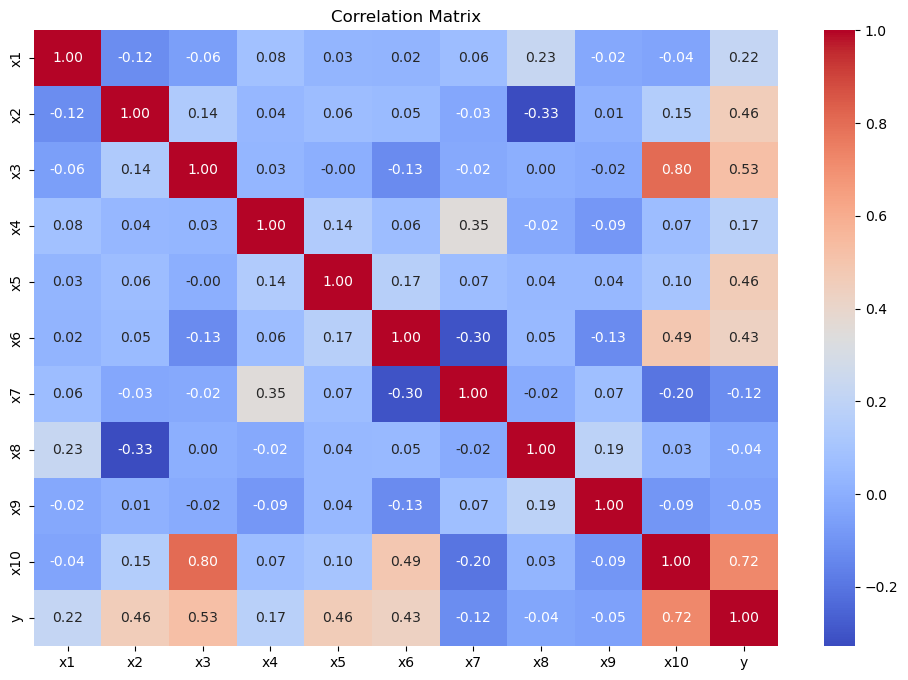

In [118]:
plt.figure(figsize=(12, 8))
sns.heatmap(reg2_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:

candidate_idx = [0, 1, 3, 4, 9]  
Z= X[:, candidate_idx]
Z_names = [column_names[i] for i in candidate_idx]

# Split with different random_state than data generation
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train) 
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Estimated Model') 

# Predict and calculate metrics
y_pred_test1 = model_LR.predict(Z_test)
mse = mean_squared_error(y_test, y_pred_test1)
r2 = r2_score(y_test, y_pred_test1)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 score: {r2:.2f}')
print("coeff",  model_LR.coef_)
print("intercept", model_LR.intercept_)



Estimated Model:
 y = -15.23 + 59.49*x1 + 79.55*x2 + 10.04*x4 + 59.08*x5 + 176.93*x10
Mean Squared Error: 11.89
R2 score: 0.79
coeff [ 59.49259678  79.55496408  10.04297335  59.07923101 176.93213424]
intercept -15.234206880860656


#### Your written answers here

What are your model parameters?
- y = -15.23 + 59.49*x1 + 79.55*x2 + 10.04*x4 + 59.08*x5 + 176.93*x10
- coefficient: [ 59.49259678  79.55496408  10.04297335  59.07923101 176.93213424]
- intercept -15.234206880860656

Which features (x1, x2...) were significant? Which were co-linear?
 - Significant feature: x10,x6,x5,x3,x2.
- co-linear  feature: x3, x6,  x10
 
What were your MSE and R^2?
 - R2 error is: 0.79
 - MSE is : 11.89



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


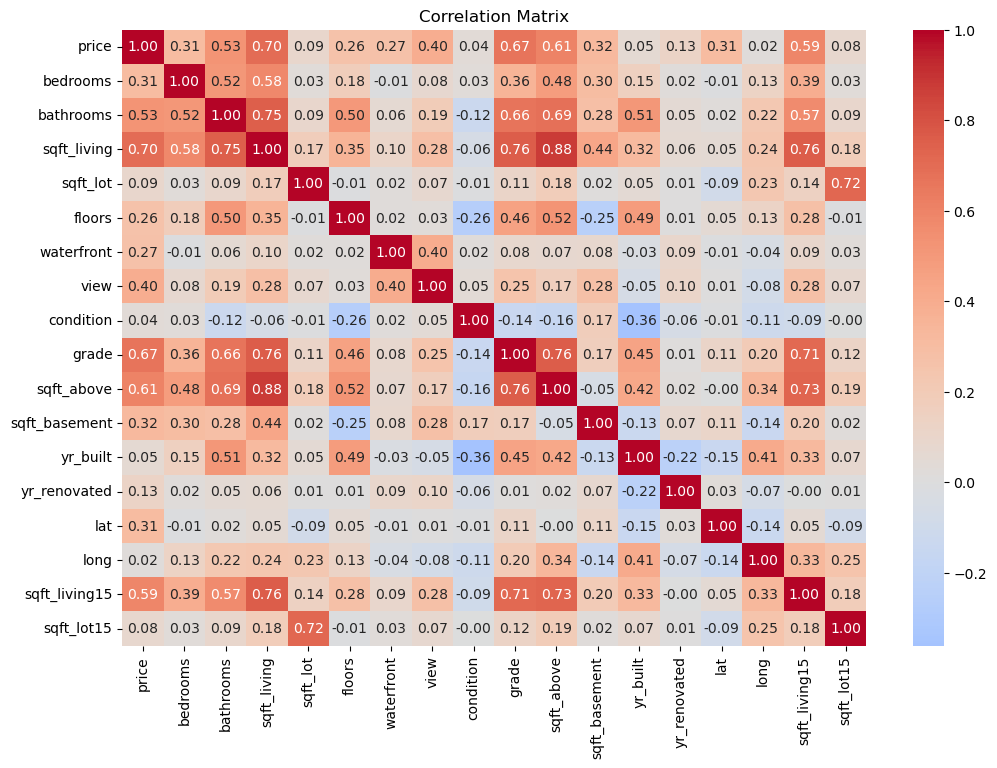

In [ ]:
# Your code here. Add cells as needed.

#drop columns id,date and zipcode
housing_df = pd.read_csv('kc_house_data.csv')
housing_df = housing_df.drop(columns = ['id', 'date', 'zipcode'])
housing_corr = housing_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(housing_corr, annot=True, center=0, fmt='.2f', cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

#.7,.67,.61,.59, .53, 
# sqft_living, grade, sqft_above,sqft_loft, bathrooms, ?
#grade, view, 

The R2 score for test data is:  0.5751604683354237


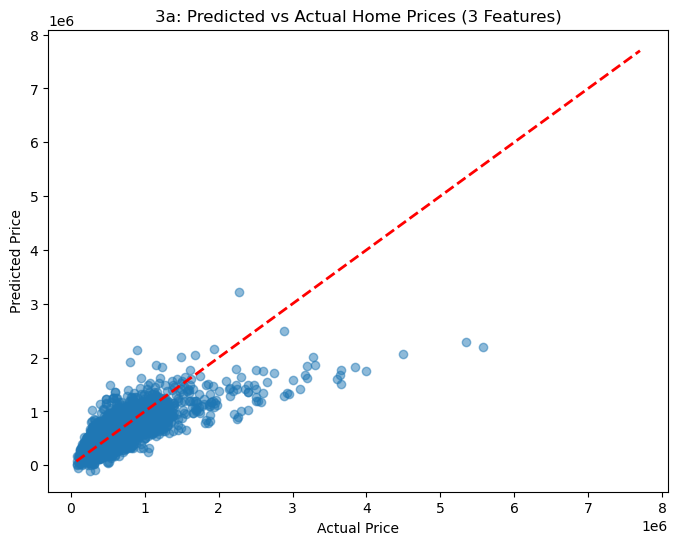

In [121]:
# Select three features and target variable
features_3a = ['view', 'sqft_living', 'grade']
X_3a = housing_df[features_3a]
y_3a = housing_df['price']

# Scale features
scaler_3a = StandardScaler()
X_3a_scaled = scaler_3a.fit_transform(X_3a)

# Fit Linear Regression model
X_3a_train, X_3a_test, y_3a_train, y_3a_test = train_test_split(X_3a_scaled, y_3a, test_size = 0.2, random_state = 42)

model_3a = LinearRegression()
model_3a.fit(X_3a_train, y_3a_train)

# Predict and plot results
y_pred_3a = model_3a.predict(X_3a_test)
r2_3a = r2_score(y_3a_test, y_pred_3a)

print("The R2 score for test data is: ", r2_3a)

plt.figure(figsize=(8,6))
plt.scatter(y_3a_test, y_pred_3a, alpha=0.5)
plt.plot([y_3a.min(), y_3a.max()], [y_3a.min(), y_3a.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("3a: Predicted vs Actual Home Prices (3 Features)")
plt.show()

#### Your written answers here
Which features are you using and why?
-  sqft_living, grade, and view because these 3 has high corelation with the price and comparatively less with each other.


### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

Feature names: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
The R2 score for all features is:  0.6941801462332485
The coefficients are:  [-26052.27905837  33460.16236876  76252.78124791   3377.11956502
   2633.59117749  46282.21028003  38901.50198188  19195.63505155
 103149.08357767  70534.1965793   25599.60998884 -67086.36088858
  10370.79269113  75306.56797517 -15972.66535784  24776.34293908
  -7935.32718056]
Top 3 features by coefficient magnitude: ['lat', 'sqft_living', 'grade']


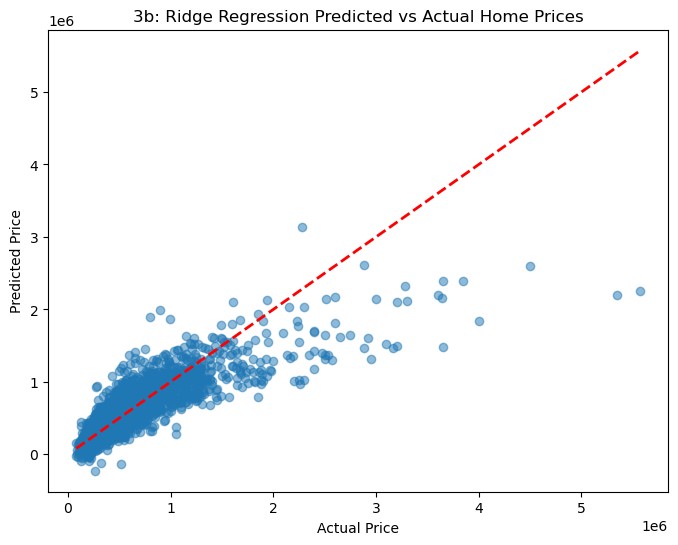

In [ ]:
# Your code here. Add cells as needed.
#housing_df = housing_df.drop(columns = ['date', 'zipcode', 'id'])
X_all = housing_df.drop(columns = 'price')
y_all = housing_df['price']

# Save list of feature names
feature_names = X_all.columns.to_list()
print("Feature names:", feature_names)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = 0.2, random_state = 42)

# Scale features
scaler_all = StandardScaler() # Create a StandardScaler object
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)


# Fit Ridge Regression with a large alpha to get R² > 0.65
ridge_model = Ridge(alpha = 800)
ridge_model.fit(X_train_all_scaled, y_train_all)

#calculatr R2 score
r2_all = ridge_model.score(X_test_all_scaled, y_test_all)
print("The R2 score for all features is: ", r2_all)

#coefficients
ridge_model_coef_ = ridge_model.coef_
print("The coefficients are: ", ridge_model_coef_)


top3_indices = np.argsort(np.abs(ridge_model_coef_))[-3:]
top3_features = [feature_names[i] for i in top3_indices]
print("Top 3 features by coefficient magnitude:", top3_features)


# Plot predicted vs actual home prices
y_pred_all = ridge_model.predict(X_test_all_scaled)
plt.figure(figsize=(8,6))
plt.scatter(y_test_all, y_pred_all, alpha=0.5)
plt.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("3b: Ridge Regression Predicted vs Actual Home Prices")
plt.show()


### Your written answers here
Which regression did you use?
 - I used Ridge Regression.

Does your regularized model look better than your MLR? How so?
 - Compared to a standard multiple linear regression (MLR), the regularized (Ridge) model tends to reduce overfitting by penalizing large coefficients. This leads to a more robust model that generalizes better, as evidenced by an R² of approximately 0.694 compared to  0.575. 

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

3c: Ridge model R2 for homes below $1M = 0.6861974569000552
3c: Ridge model R² for homes above $1M = 0.43286947108742746


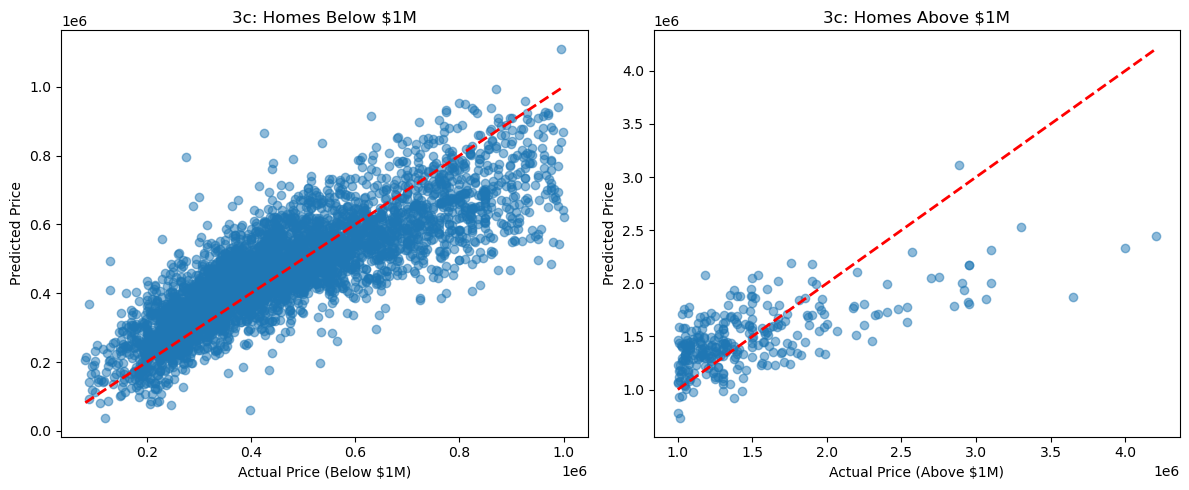

In [ ]:
# Your code here. Add cells as needed.

# Split data into two groups based on sale price
df_below = housing_df[housing_df['price'] < 1_000_000]
df_above = housing_df[housing_df['price'] >= 1_000_000]

# --- Model for homes below $1M ---
X_below = df_below.drop(columns=['price'])
y_below = df_below['price']
X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X_below, y_below, test_size=0.2, random_state=15)
scaler_below = StandardScaler()
X_train_below_scaled = scaler_below.fit_transform(X_train_below)
X_test_below_scaled = scaler_below.transform(X_test_below)

ridge_below = Ridge(alpha = 800)
ridge_below.fit(X_train_below_scaled, y_train_below)
r2_below = ridge_below.score(X_test_below_scaled, y_test_below)
print("3c: Ridge model R2 for homes below $1M =", r2_below)
y_pred_below = ridge_below.predict(X_test_below_scaled)

# --- Model for homes above $1M ---
X_above = df_above.drop(columns=['price'])
y_above = df_above['price']
X_train_above, X_test_above, y_train_above, y_test_above = train_test_split(X_above, y_above, test_size=0.2, random_state=15)
scaler_above = StandardScaler()
X_train_above_scaled = scaler_above.fit_transform(X_train_above)
X_test_above_scaled = scaler_above.transform(X_test_above)

ridge_above = Ridge(alpha=800)
ridge_above.fit(X_train_above_scaled, y_train_above)
r2_above = ridge_above.score(X_test_above_scaled, y_test_above)
print("3c: Ridge model R² for homes above $1M =", r2_above)
y_pred_above = ridge_above.predict(X_test_above_scaled)

# Plot predicted vs actual for both subsets
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test_below, y_pred_below, alpha=0.5)
plt.plot([y_test_below.min(), y_test_below.max()], [y_test_below.min(), y_test_below.max()], 'r--', lw=2)
plt.xlabel("Actual Price (Below $1M)")
plt.ylabel("Predicted Price")
plt.title("3c: Homes Below $1M")

plt.subplot(1,2,2)
plt.scatter(y_test_above, y_pred_above, alpha=0.5)
plt.plot([y_test_above.min(), y_test_above.max()], [y_test_above.min(), y_test_above.max()], 'r--', lw=2)
plt.xlabel("Actual Price (Above $1M)")
plt.ylabel("Predicted Price")
plt.title("3c: Homes Above $1M")

plt.tight_layout()
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

  - After splitting the data:
	•	For homes below $1M, the Ridge model achieved an R² of approximately  0.686.
	•	For homes above $1M, the R² was approximately 0.432.

This indicates that the model fits the lower-priced segment better than the higher-priced segment. The overvaluation in the higher price range is evident from the lower R². 
 
